In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("Ecommerce Customers")
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


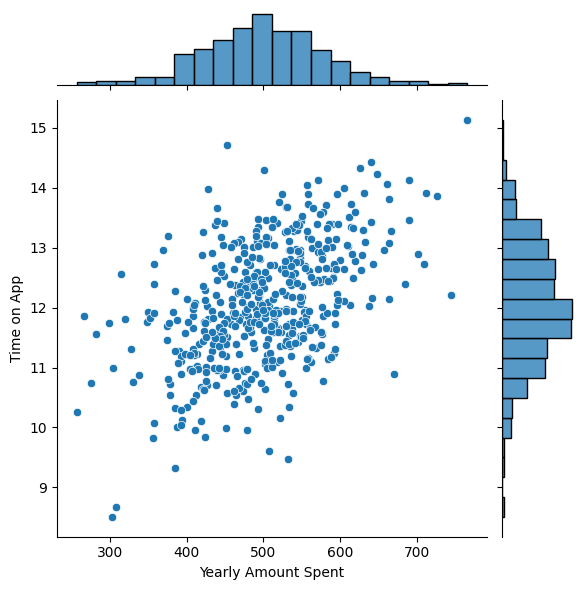

In [5]:
# EDA
sns.jointplot(x='Yearly Amount Spent',y='Time on App', data=df)

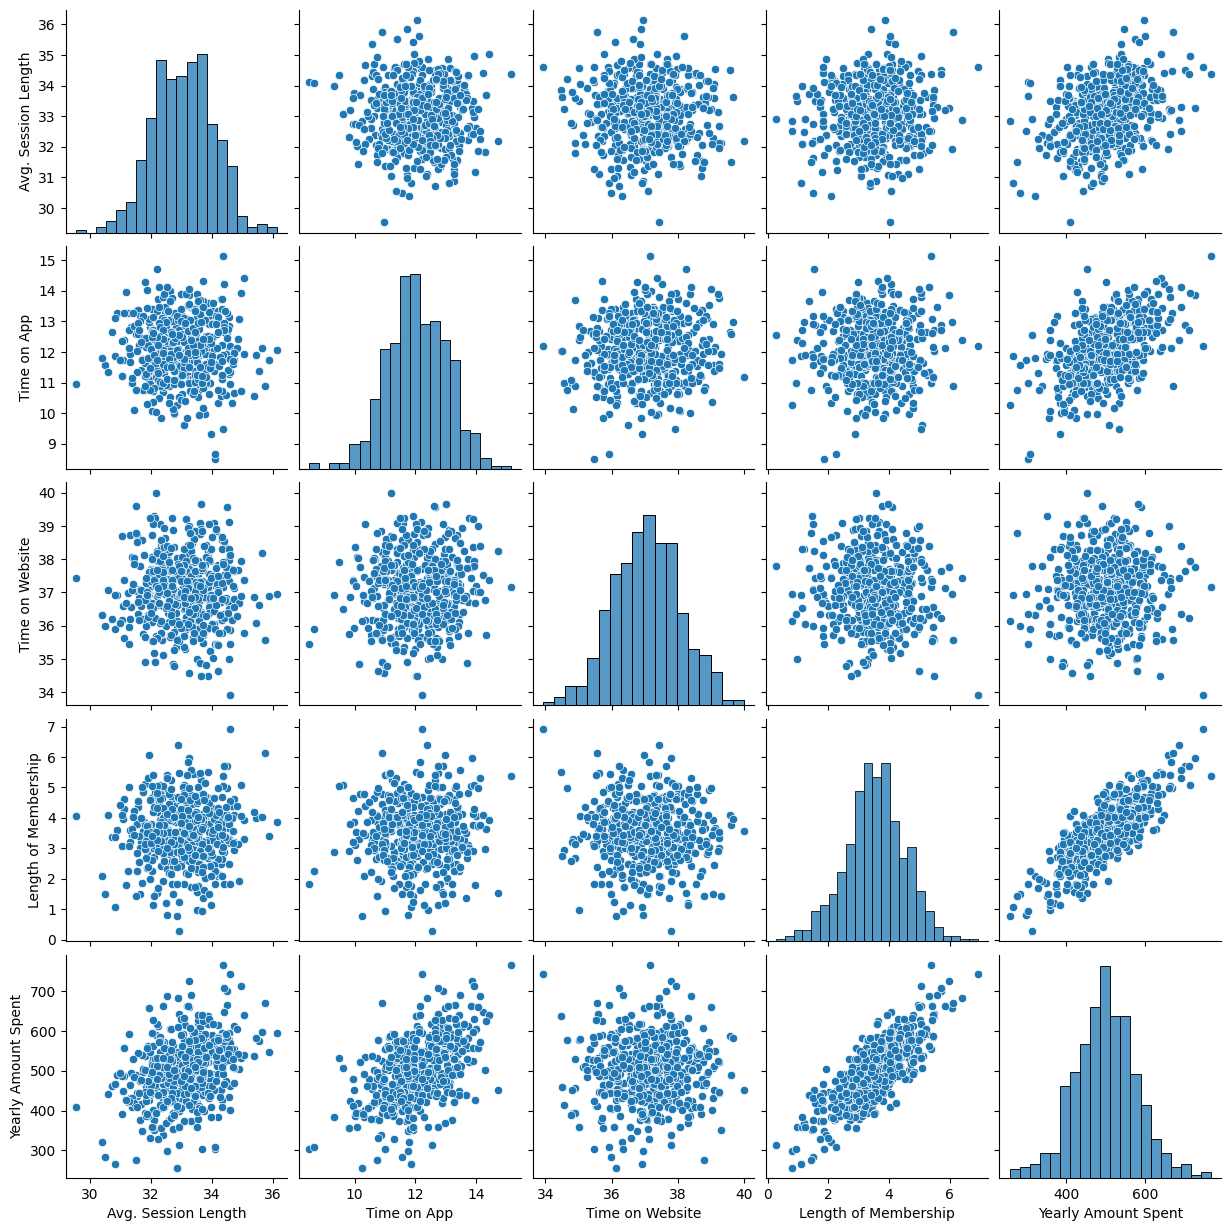

In [41]:
sns.pairplot(data=df)

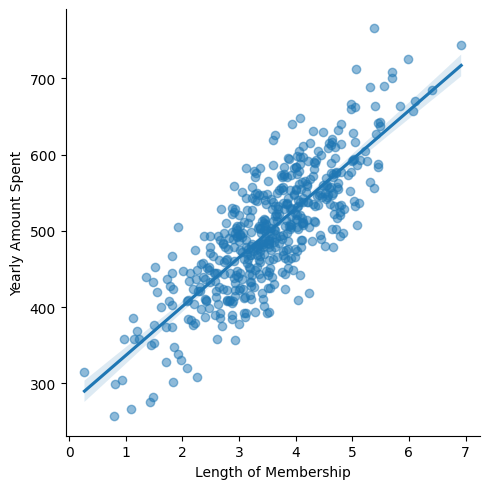

In [7]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df, scatter_kws={'alpha':0.5})

In [4]:
from sklearn.model_selection import train_test_split
x=df[['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']]
y=df[['Yearly Amount Spent']]

In [5]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [6]:
y_test

,Yearly Amount Spent
52,384.626572
349,443.197221
302,541.972204
21,419.938775
208,412.012931
...,...
295,432.720718
201,590.562720
40,532.751788
435,571.216005


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model=LinearRegression()

In [9]:
model.fit(X_train,y_train)

LinearRegression()

In [10]:
model.coef_

array([[25.58786392, 39.03425071,  0.09767257, 61.75897645]])

In [11]:
pred=model.predict(X_test)

Text(0.5, 1.0, 'Evaluation of our model')

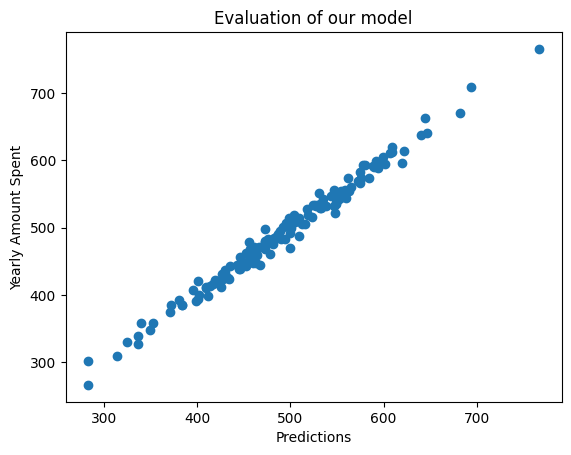

In [12]:
plt.scatter(pred,y_test)
plt.ylabel('Yearly Amount Spent')
plt.xlabel('Predictions')
plt.title('Evaluation of our model')

In [13]:
# Analyzing the Model

from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

In [14]:
print("Mean Squared Error: ",mean_squared_error(y_test,pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred))
print("RSME: ",math.sqrt(mean_squared_error(y_test,pred)))


Mean Squared Error:  97.37819355757648
Mean Absolute Error:  7.75280980322496
RSME:  9.868038992503854


In [15]:
# Residual Analysis

residuals=y_test-pred   

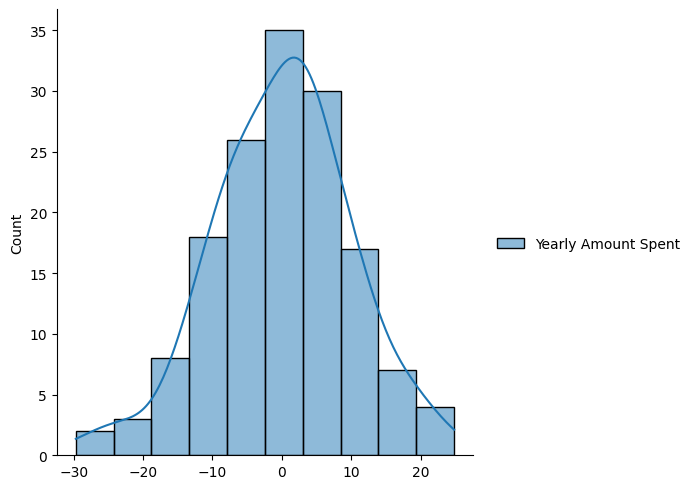

In [22]:
sns.displot(residuals,bins=10, kde=True)